In [751]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score

##accessing columns| ndarray[:,col_i]
##accessing rows   | ndarray[row_i,:]
##python q2.py continuous.csv secrettestset.csv
#then it (1) estimates the parameters of your regression model from the data in
#continuous.csv and 
# (2) outputs the predicted Y value for each data point in
#secrettest.csv and also the R2 value for the fitted regression model when evaluated on
#secrettest.csv.

In [752]:
def data_loader(data):
    f = data[:,0:10]
    t = data[:,[10]]
    return f,t

In [753]:
data = np.genfromtxt('continuous.csv', delimiter=',')
#secret = np.genfromtxt('secrettest.csv', delimiter=',')
secret = np.genfromtxt('oopsie.csv', delimiter=',')
features,target = data_loader(data)
print(features)
f_secret, t_secret = data_loader(secret)

[[ 1.51310295 -0.10339218 -0.12749365  4.12766827  0.85505075 -3.74785806
  -3.92783902  6.33852155  1.79762012  7.72338274]
 [ 1.16838245  0.47518464 -0.84092448  3.79550633  0.36748158  3.69968141
  -3.56642722  5.03857649 -2.64402754 -5.13133687]
 [ 1.93273794  1.0034921   0.2729996   2.73306788  2.66285102  6.9234767
  -0.79380063 -5.09251838  9.20083108  8.39779624]
 [ 0.07393722  0.85402422  3.39643865  1.97852552 -1.8418167  -4.65256318
  -0.44296847  4.35800368 -3.09552618 -1.89129219]
 [ 0.58058493  0.35921193 -0.11026297 -1.41232749  1.08156862 -2.42967563
   0.45510467 -1.33030389  1.27592554 -2.98755141]
 [ 1.13149399  1.82856479 -1.22202037  0.10529109  0.0350207   5.27317557
  -2.72329207  3.24507505 -0.90651851 -2.30393294]
 [ 0.20734055 -0.96926252  1.38131912  1.70420469 -3.15797975 -0.26862794
   0.27819395  5.82547085 -4.83780118  6.36262642]
 [ 0.10575891  1.03071929  3.24903683  1.89999112 -2.13220795 -2.04734636
   4.07142008  2.77054074  6.21716344 -2.71635989]]


In [754]:
def print_exam(model, t_features, t_target):
    print("R^2 value for the secret test %.3f" % model.score(t_features,t_target))
    print("Predictions for the secret test:")
    print(model.predict(t_features))

def evaluate(model, Xt, Yt, has_plot = False):
    print("="*50)
    name = type(model).__name__
    print("Metrics for", name)
    print("R^2 value %.3f" % model.score(Xt,Yt))
    print("CrossValidated R^2 values at 3 folds:", cross_val_score(model, Xt, Yt,scoring='r2', cv=3))
    print("Coefficients:", model.coef_)
    print("Intercept i.e. beta0", model.intercept_)
    if has_plot:
        for i in range(len(Xt[0])):
            #print("Now considering feature X",i)
            sorted_index = np.argsort(Xt[:,i])
            #print("Sorted features' indices:",sorted_index)
            sX = np.sort(Xt[:,i])
            #print("Sorted Features",sX)
            sY = Yt[sorted_index]
            #print("Sorted Targets", sY)
            plot(sX, sY, model.predict(Xt),("X"+str(i+1),"Target"))
    print("="*50)

In [755]:
def plot(X, Y, pred = None, labels = ("Feature","Target")):
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.plot(X, Y, 'o', label='data')
    if pred is not None : plt.plot(X, pred, color='blue', linewidth=3)
    plt.show()

In [756]:
# LR is prone to overfitting. Training score is 1 where testing score is very low
print("CV + Linear regression")
lr = LinearRegression().fit(features, target)
evaluate(lr,features,target, False)

CV + Linear regression
Metrics for LinearRegression
R^2 value 1.000
CrossValidated R^2 values at 3 folds: [-3.35925863e-02  3.32045211e-01 -3.43542121e+02]
Coefficients: [[-0.94362887 -4.32424782 -1.79190439 -2.08891205 -2.5991196   0.53794002
   7.96346904 -1.09684705  1.33241642  3.95700382]]
Intercept i.e. beta0 [9.66432755]


In [757]:
print("CV + Ridge")
alphas = np.arange(0.1, 100, 0.5)
ridgeCV = Ridge(alpha=8.6).fit(features,target)
#print("Calculated L2 penalty: ",ridgeCV.alpha_)
evaluate(ridgeCV,features,target,False)

CV + Ridge
Metrics for Ridge
R^2 value 0.981
CrossValidated R^2 values at 3 folds: [ 5.04853026e-01  3.58255491e-01 -4.28132206e+02]
Coefficients: [[-0.80527779 -1.58322057  0.54180315 -2.06790023 -2.44095722  0.26951984
   5.55220573 -1.42780245  1.33534639  3.81339487]]
Intercept i.e. beta0 [5.3609943]


In [758]:
lassoCV = Lasso(alpha=9.891060324462192).fit(features,target)
#lassoCV = LassoCV().fit(features,target)
print(lassoCV.get_params())
#print("Calculated L1 penalty:", lassoCV.alpha_)
evaluate(lassoCV, features, target,False)

{'alpha': 9.891060324462192, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Metrics for Lasso
R^2 value 0.958
CrossValidated R^2 values at 3 folds: [   0.87219887    0.75356687 -688.02300149]
Coefficients: [-0.         -0.          0.         -0.         -0.          0.
  7.44803756 -1.01830367  0.16547295  3.71985357]
Intercept i.e. beta0 [2.69300365]


In [759]:
# #CV lasso penalises all but the last 4 features. We use a CVLasso model so that the penalty is automatically learned
print("CVLasso Regression")
r_features = features[:,6:] #derived from LassoCV
r_lassoCV = Lasso(alpha=3.9930381235673518).fit(r_features,target)
print(r_lassoCV.get_params())
#print("Calculated L1 penalty:", r_lassoCV.alpha_)
evaluate(r_lassoCV, r_features, target, False)

CVLasso Regression
{'alpha': 3.9930381235673518, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Metrics for Lasso
R^2 value 0.980
CrossValidated R^2 values at 3 folds: [   0.58068651    0.77392715 -247.49619968]
Coefficients: [ 8.50563338 -1.34733282  0.          4.02694095]
Intercept i.e. beta0 [4.30093209]


CVLasso Regression
{'alpha': 0.2627152448819272, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Metrics for Lasso
R^2 value 0.984
CrossValidated R^2 values at 3 folds: [  0.85716983   0.77093571 -81.43584189]
Coefficients: [ 9.13699415 -1.47329235  4.20002768]
Intercept i.e. beta0 [4.99751925]


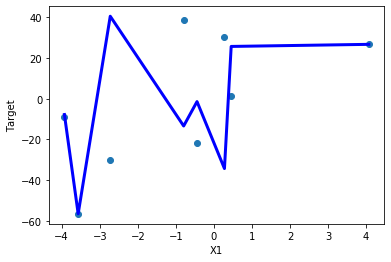

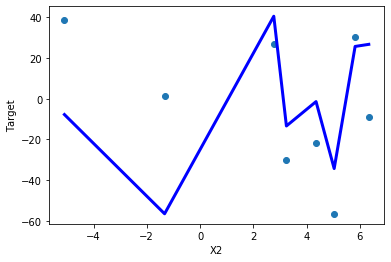

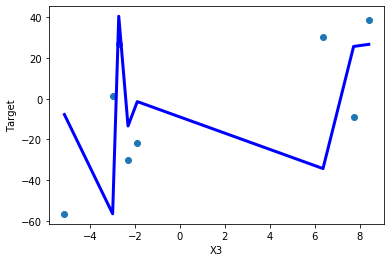

In [762]:
print("CVLasso Regression")
r2_features = (features[:,6:])[:,[0,1,3]] #derived from LassoCV
r2_lassoCV = Lasso(alpha=0.2627152448819272).fit(r2_features,target)
print(r2_lassoCV.get_params())
#print("Calculated L1 penalty:", r_lassoCV.alpha_)
evaluate(r2_lassoCV, r2_features, target, True)

In [761]:
print_exam(lassoCV,features,target)
print_exam(r_lassoCV,r_features,target)
print_exam(r2_lassoCV,r2_features,target)

# lst = [item for sublist in features for item in sublist]
# plt.hist(lst, bins="auto")
# print("Pre flatten mean:", np.mean(lst))
# 
# scaler = StandardScaler().fit(features)
# trans = scaler.transform(features) #apply scaler.inverse_transform(trans)
# lst = [item for sublist in trans for item in sublist]
# plt.hist(lst, bins="auto")
# print("Post flatten mean:", np.mean(lst))

R^2 value for the secret test 0.958
Predictions for the secret test:
[ -3.98891829 -48.52601801  34.72753784 -12.59156914  -3.46482899
 -29.6149473   21.70041767  21.12015281]
R^2 value for the secret test 0.980
Predictions for the secret test:
[ -6.5463185  -53.48602039  38.22790162 -12.95459866  -2.06644548
 -32.5123899   24.44022063  24.25947727]
R^2 value for the secret test 0.984
Predictions for the secret test:
[ -7.79119694 -56.56395855  40.51831255 -13.41397411  -1.43206414
 -34.34271089  25.67996117  26.70745749]
